## 機械学習の基本的な流れ
訓練データでクロスバリデーションを行い、最適なパラメーターを見つける。  
そのパラメーターをテストデータに適用する。

### データを読み込む

In [85]:
import pandas as pd

In [86]:
df = pd.read_csv('iris.data', header=None, names=['sepal_length', 'sepal_width',
                                                  'petal_length', 'petal_width', 'class'])
X = df.iloc[:,:-1]
y = df.iloc[:,-1].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

### データを訓練用とテスト用に分ける

In [87]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, train_size=0.6, test_size=0.4, random_state=0)
train_index, test_index = next(ss.split(X, y))
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

### 訓練データでクロスバリデーションを行う（パラメーターは規定値で）

In [88]:
import numpy as np

In [89]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(max_iter=10000)

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
scores = cross_val_score(clf, X_train, y_train, cv=10)

In [92]:
scores.mean()

0.9666666666666666

### 訓練データでクロスバリデーションを行いながら最適なパラメーターを探す

In [93]:
C_range_exp = np.linspace(start=-5, stop=10, num=16)

In [94]:
C_range = 10 ** C_range_exp

In [95]:
C_range

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])

In [96]:
all_scores_mean = []
all_scores_std = []

for C in C_range:
    clf.C = C
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    all_scores_mean.append(scores.mean())
    all_scores_std.append(scores.std())

Text(0.5, 1.0, 'Accuracy for different values of C')

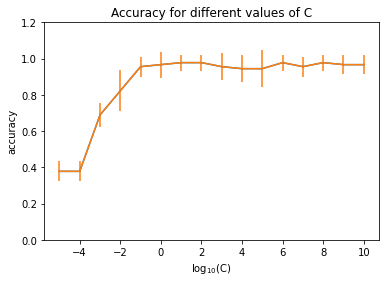

In [97]:
import matplotlib.pyplot as plt
plt.plot(C_range_exp, all_scores_mean)
plt.errorbar(C_range_exp, all_scores_mean, yerr=all_scores_std)
plt.ylim(0, 1.2)
plt.ylabel('accuracy')
plt.xlabel('$\log_{10}$(C)')
plt.title('Accuracy for different values of C')

In [98]:
all_scores_mean = np.array(all_scores_mean)
all_scores_std = np.array(all_scores_std)

In [99]:
all_scores_mean.max()

0.9777777777777779

In [100]:
max_index = np.argmax(all_scores_mean)

In [101]:
max_index

6

#### 最適なパラメーターをテストデータに適用する

In [102]:
clf.C = 10 ** C_range_exp[max_index]

In [103]:
clf.fit(X_train, y_train)

LogisticRegression(C=10.0, max_iter=10000)

In [104]:
clf.score(X_test, y_test)

0.9166666666666666

### （参考）クロスバリデーションなし

In [105]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9166666666666666